In [3]:
from sklearn.datasets import fetch_20newsgroups
# from gensim.models import word2vec
# import gensim
import nltk
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
# 最适用在该问题上的变种是多项式分类器:
from sklearn.naive_bayes import MultinomialNB
# 在测试集上的性能评估
import numpy as np
categories = ['alt.atheism', 'soc.religion.christian','comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(data_home='./dataset',subset='train',
                                  categories=categories,shuffle=True,random_state=42)

twenty_test = fetch_20newsgroups(data_home='./dataset',subset='test',
                                 categories=categories, shuffle=True, random_state=42)

docs_test = twenty_test.data

In [ ]:
len(twenty_train.data)

In [5]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Franpin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
import pandas as pd
stopwords=pd.read_table('stopwords/baidu_stopwords.txt',
                        names=['words'],encoding='utf-8')


In [9]:
import re
train_lst=[]
test_lst=[]
for sentence in twenty_train.data:
    out = re.sub(r'[^\w\s]','',sentence)#去掉符号
    words = [word for word in word_tokenize(out) 
             if word not in list(stopwords['words'])]#去停用词
    lst=' '.join(words)
    train_lst.append(lst)

for sentence in twenty_test.data:
    out = re.sub(r'[^\w\s]','',sentence)#去掉符号
    words = [word for word in word_tokenize(out) 
             if word not in list(stopwords['words'])]#去停用词
    lst=' '.join(words)
    test_lst.append(lst)

KeyboardInterrupt: 

In [79]:
np.savetxt('words_news_train.txt',train_lst,fmt = '%s',encoding='utf-8',delimiter=",")
np.savetxt('words_news_test.txt',test_lst,fmt = '%s',encoding='utf-8',delimiter=",")

In [2]:
with open('words_news_train.txt','r',encoding='utf-8') as f:
    train_lst=f.readlines()
train_lst=[x.split() for x in train_lst]
with open('words_news_test.txt','r',encoding='utf-8') as f:
    test_lst=f.readlines()
test_lst=[x.split() for x in test_lst]

In [3]:
train_lst=np.array(train_lst)
test_lst=np.array(test_lst)

<ipython-input-3-d80e8da3a40f>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  train_lst=np.array(train_lst)
<ipython-input-3-d80e8da3a40f>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  test_lst=np.array(test_lst)


In [4]:
data=np.hstack((train_lst,test_lst))

In [83]:
data.shape

(3759,)

In [84]:
import gensim
model=gensim.models.Word2Vec(data,sg=1,vector_size=100,
                            window=5,min_count=2,negative=3,
                             sample=0.001,hs=1,workers=4)

model.wv.save_word2vec_format("word2vec_model_news")

In [1]:
import numpy as np
import gensim
from gensim.models import KeyedVectors,word2vec,Word2Vec
model = KeyedVectors.load_word2vec_format('word2vec_model_news')#加载模型

In [5]:
train_text_vec = np.zeros((len(train_lst), 100))
s=np.zeros(100)
for i,sentence in enumerate(train_lst):
    lenth=len(sentence)
    vec=0
    if lenth==0:
        train_text_vec[i]=0
        continue
    for word in sentence:
        try:
            vec=vec+model[word]
        except:
            pass
    train_text_vec[i]=vec/lenth
test_text_vec = np.zeros((len(test_lst), 100))
s=np.zeros(100)  
for i,sentence in enumerate(test_lst):
    lenth=len(sentence)
    vec=0
    if lenth==0:
        test_text_vec[i]=0
        continue
    for word in sentence:
        try:
            vec=vec+model[word]
        except:
            pass
    test_text_vec[i]=vec/lenth

In [6]:
x_train=train_text_vec
x_test=test_text_vec

In [7]:
x_train.shape

(2257, 100)

In [8]:
x_test.shape

(1502, 100)

In [9]:
from sklearn import preprocessing
 
def min_max_normalization(np_array):
    min_max_scaler = preprocessing.MinMaxScaler()
    ret = min_max_scaler.fit_transform(np_array)
    return ret
x_train=min_max_normalization(x_train)
x_test=min_max_normalization(x_test)

In [10]:
# 朴素贝叶斯分类
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score
from sklearn.naive_bayes import MultinomialNB
text_clf =MultinomialNB()
text_clf.fit(x_train, twenty_train.target)
predicted = text_clf.predict(x_test)
acc_score1=accuracy_score(predicted,twenty_test.target)
recall_score1=recall_score(predicted,twenty_test.target,average='macro')
f1_score1=f1_score(predicted,twenty_test.target,average='macro')
pre_score1=precision_score(predicted,twenty_test.target,average='macro')

In [11]:
# 随机梯度下降分类器
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score
from sklearn.linear_model import SGDClassifier
text_clf =SGDClassifier()
text_clf.fit(x_train, twenty_train.target)
predicted = text_clf.predict(x_test)
acc_score2=accuracy_score(predicted,twenty_test.target)
recall_score2=recall_score(predicted,twenty_test.target,average='macro')
f1_score2=f1_score(predicted,twenty_test.target,average='macro')
pre_score2=precision_score(predicted,twenty_test.target,average='macro')

In [12]:
# KNN分类器
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score
from sklearn.neighbors import KNeighborsClassifier
text_clf =KNeighborsClassifier()
text_clf.fit(x_train, twenty_train.target)
predicted = text_clf.predict(x_test)
acc_score3=accuracy_score(predicted,twenty_test.target)
recall_score3=recall_score(predicted,twenty_test.target,average='macro')
f1_score3=f1_score(predicted,twenty_test.target,average='macro')
pre_score3=precision_score(predicted,twenty_test.target,average='macro')

In [13]:
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score
from sklearn.svm import SVC
text_clf =SVC(decision_function_shape = 'ovo')
text_clf.fit(x_train, twenty_train.target)
predicted = text_clf.predict(x_test)
acc_score4=accuracy_score(predicted,twenty_test.target)
recall_score4=recall_score(predicted,twenty_test.target,average='macro')
f1_score4=f1_score(predicted,twenty_test.target,average='macro')
pre_score4=precision_score(predicted,twenty_test.target,average='macro')

In [14]:
import torch


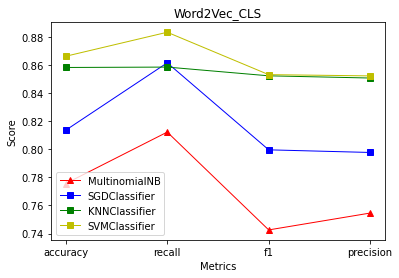

In [15]:
import matplotlib.pyplot as plt
import numpy as np

Mul_score=[acc_score1,recall_score1,f1_score1,pre_score1]
SGD_score=[acc_score2,recall_score2,f1_score2,pre_score2]
KNN_score=[acc_score3,recall_score3,f1_score3,pre_score3]
SVM_score=[acc_score4,recall_score4,f1_score4,pre_score4]
score=['accuracy','recall','f1','precision']
plt.plot(score, Mul_score, color="r", linestyle="-", 
         marker="^", linewidth=1, label="MultinomialNB")
plt.plot(score, SGD_score, color="b", linestyle="-",
         marker="s", linewidth=1, label="SGDClassifier")
plt.plot(score, KNN_score, color="g", linestyle="-",
         marker="s", linewidth=1, label="KNNClassifier")
plt.plot(score, SVM_score, color="y", linestyle="-",
         marker="s", linewidth=1, label="SVMClassifier")
plt.legend()
plt.ylabel("Score", loc='center')
plt.xlabel("Metrics", loc='center')
plt.title("Word2Vec_CLS")

plt.show()